In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


#Crawl Data

##Import thư viện, install facebook_scraper

In [ ]:
%pip install facebook_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 359.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 4.7 MB/s eta 0:00:00
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75297 sha256=3ef8f1ac40e297b307de154af20a8c1779f0349cb48d2b52b040c80f27a51405
  Stored in directory: /root/.cache/pip/wheels/bd/5d/ed/60c261589c275c950ad7f87a906849e0aa70c0f1f9a5110a39
  Created wheel for bs4: filename

In [ ]:
# Import thư viện cần thiết
from facebook_scraper import get_posts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##Crawl page

In [ ]:
FANPAGE_LINK ="Theanh28"
FOLDER_PATH = ""
COOKIE_PATH = ""

In [ ]:
post_list = []
for post in get_posts(FANPAGE_LINK,
                    options={
        "comments": True,
        "reactions": True,
        "allow_extra_requests": True,
    }, extra_info=True, pages=300, cookies=COOKIE_PATH):
    post_list.append(post)

In [ ]:
post_list[0]

In [ ]:
print(type(post_list[0]))
x = post_list[0].keys()
x

<class 'dict'>


dict_keys(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live', 'fetched_time'])

In [ ]:
# Initialize dataframe to scrape Facebook post
post_df_full = pd.DataFrame(columns = [])
# Start to collect Facebook post data by facebook_scraper library
for post in post_list:
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id']+' get')

In [ ]:
# hiển thị 10 post đầu tiên
post_df_full.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header,video_ids,videos
0,7341596765886180,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,,None,2023-03-31 08:30:25,1680251425,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,[https://scontent-qro1-2.xx.fbcdn.net/v/t39.30...,...,None,1509435412435707,None,7341596332552890,[7341596332552890],False,2023-03-31 08:36:45.548622,NaN,NaN,NaN
0,7341544862558037,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,,None,2023-03-31 08:09:31,1680250171,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,[https://scontent-qro1-2.xx.fbcdn.net/v/t39.30...,...,None,1509435412435707,None,7341542882558235,[7341542882558235],False,2023-03-31 08:37:01.283784,NaN,NaN,NaN
0,7341504075895449,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...","LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",,None,2023-03-31 07:54:09,1680249249,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,[https://scontent-qro1-2.xx.fbcdn.net/v/t39.30...,...,None,1509435412435707,None,7341489325896924,[7341489325896924],False,2023-03-31 08:37:37.975986,NaN,NaN,NaN
0,7341432399235950,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,,None,2023-03-31 07:27:04,1680247624,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,[https://scontent-qro1-2.xx.fbcdn.net/v/t39.30...,...,None,1509435412435707,None,7341357959243394,[7341357959243394],False,2023-03-31 08:37:57.257618,NaN,NaN,NaN
0,7341374382575085,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,,None,2023-03-31 07:05:28,1680246328,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,[https://scontent-qro1-2.xx.fbcdn.net/v/t39.30...,...,None,1509435412435707,None,7341361275909729,[7341361275909729],False,2023-03-31 08:38:22.070040,NaN,NaN,NaN


In [ ]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 0
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        1196 non-null   object        
 1   text                           1071 non-null   object        
 2   post_text                      1071 non-null   object        
 3   shared_text                    1069 non-null   object        
 4   original_text                  0 non-null      object        
 5   time                           1196 non-null   datetime64[ns]
 6   timestamp                      1183 non-null   object        
 7   image                          872 non-null    object        
 8   image_lowquality               1196 non-null   object        
 9   images                         1196 non-null   object        
 10  images_description             1196 non-null   object        
 11  images_lowquality   

## Save file

In [ ]:
path=FOLDER_PATH + FANPAGE_LINK + ".xlsx"
post_df_full.to_excel(FOLDER_PATH + FANPAGE_LINK + ".xlsx", index=False)
print(path)

/content/drive/MyDrive/Project/Crawldata/Theanh28.xlsx


In [ ]:
# importing library
import numpy as np
# converting list to array
arr = np.array(post_list)

In [ ]:
path1=FOLDER_PATH + FANPAGE_LINK + ".npy"
np.save(path1, arr)    # .npy extension is added if not given
print(path1)

/content/drive/MyDrive/Project/Crawldata/Theanh28.npy


#Preprocessing và Sentiment Analysis

##Phân tích REACT

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
post_df_full = pd.read_excel('/content/drive/MyDrive/Project/FACEBOOK analysis/Theanh28.xlsx')

post_df_full.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header,video_ids,videos
0,7341596765886180,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,NaN,NaN,2023-03-31 08:30:25,1.680251e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341596e+15,['7341596332552890'],False,2023-03-31 08:36:45.549,NaN,NaN,NaN
1,7341544862558037,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,NaN,NaN,2023-03-31 08:09:31,1.680250e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341543e+15,['7341542882558235'],False,2023-03-31 08:37:01.284,NaN,NaN,NaN
2,7341504075895449,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...","LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",NaN,NaN,2023-03-31 07:54:09,1.680249e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341489e+15,['7341489325896924'],False,2023-03-31 08:37:37.976,NaN,NaN,NaN
3,7341432399235950,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NaN,NaN,2023-03-31 07:27:04,1.680248e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341358e+15,['7341357959243394'],False,2023-03-31 08:37:57.258,NaN,NaN,NaN
4,7341374382575085,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,NaN,NaN,2023-03-31 07:05:28,1.680246e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341361e+15,['7341361275909729'],False,2023-03-31 08:38:22.070,NaN,NaN,NaN


In [ ]:
post_df_full.info()

In [ ]:
post_df_full.dropna(subset = {'text'}, inplace = True)

In [ ]:
post_df_full1=post_df_full
post_df_full1[['post_id', 'reactions']]

,post_id,reactions
0,7341596765886180,"{'thích': 2704, 'yêu thích': 15, 'haha': 1336,..."
1,7341544862558037,"{'thích': 4165, 'yêu thích': 17, 'haha': 3148,..."
2,7341504075895449,"{'thích': 8174, 'yêu thích': 3717, 'haha': 29,..."
3,7341432399235950,"{'thích': 7844, 'yêu thích': 14, 'haha': 30, '..."
4,7341374382575085,"{'thích': 4834, 'yêu thích': 18, 'haha': 94, '..."
...,...,...
1191,7261240513921806,NaN
1192,7260865133959344,NaN
1193,7261119273933930,NaN
1194,7261014237277767,NaN


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], marker="o")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
# Perform basic line plot to visualize post datetime vs likes, shares and comments
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], label = "Likes", marker="o")
ax.plot(post_df_full['time'], post_df_full['shares'], label = "Shares", marker="s")
ax.plot(post_df_full['time'], post_df_full['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
post_df_full1['reactions']

0       {'thích': 2704, 'yêu thích': 15, 'haha': 1336,...
1       {'thích': 4165, 'yêu thích': 17, 'haha': 3148,...
2       {'thích': 8174, 'yêu thích': 3717, 'haha': 29,...
3       {'thích': 7844, 'yêu thích': 14, 'haha': 30, '...
4       {'thích': 4834, 'yêu thích': 18, 'haha': 94, '...
                              ...                        
1191                                                  NaN
1192                                                  NaN
1193                                                  NaN
1194                                                  NaN
1195                                                  NaN
Name: reactions, Length: 1069, dtype: object

In [ ]:
post_df_full1

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header,video_ids,videos
0,7341596765886180,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,NaN,NaN,2023-03-31 08:30:25,1.680251e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341596e+15,['7341596332552890'],False,2023-03-31 08:36:45.549,NaN,NaN,NaN
1,7341544862558037,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,NaN,NaN,2023-03-31 08:09:31,1.680250e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341543e+15,['7341542882558235'],False,2023-03-31 08:37:01.284,NaN,NaN,NaN
2,7341504075895449,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...","LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",NaN,NaN,2023-03-31 07:54:09,1.680249e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341489e+15,['7341489325896924'],False,2023-03-31 08:37:37.976,NaN,NaN,NaN
3,7341432399235950,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NaN,NaN,2023-03-31 07:27:04,1.680248e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341358e+15,['7341357959243394'],False,2023-03-31 08:37:57.258,NaN,NaN,NaN
4,7341374382575085,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,NaN,NaN,2023-03-31 07:05:28,1.680246e+09,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-2.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.341361e+15,['7341361275909729'],False,2023-03-31 08:38:22.070,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,7261240513921806,Hoa hậu Trái Đất 2018 - Nguyễn Phương Khánh đế...,Hoa hậu Trái Đất 2018 - Nguyễn Phương Khánh đế...,NaN,NaN,2023-03-09 09:36:23,1.678355e+09,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-1.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,NaN,[],False,NaT,NaN,NaN,NaN
1192,7260865133959344,"Chỉ trong ngày 8/3, đã có 10 triệu người thử l...","Chỉ trong ngày 8/3, đã có 10 triệu người thử l...",NaN,NaN,2023-03-09 16:00:00,NaN,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-1.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.260864e+15,['7260864487292742'],False,NaT,NaN,NaN,NaN
1193,7261119273933930,RICHARLISON THẤT VỌNG VÌ HLV CHO NGỒI DỰ BỊ\n\...,RICHARLISON THẤT VỌNG VÌ HLV CHO NGỒI DỰ BỊ\n\...,NaN,NaN,2023-03-09 08:47:56,1.678352e+09,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-1.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.261118e+15,['7261118213934036'],False,NaT,NaN,NaN,NaN
1194,7261014237277767,SIÊU LẦY GẶP SIÊU LỪA ĐÃ CÁN MỐC 50 TỶ ĐỒNG\n\...,SIÊU LẦY GẶP SIÊU LỪA ĐÃ CÁN MỐC 50 TỶ ĐỒNG\n\...,NaN,NaN,2023-03-09 08:30:00,1.678351e+09,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,https://scontent-qro1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-qro1-1.xx.fbcdn.net/v/t39.3...,...,NaN,1509435412435707,NaN,7.261014e+15,['7261013970611127'],False,NaT,NaN,NaN,NaN


In [ ]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x: {} if pd.isna(x) else dict(eval(x)))

In [ ]:
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)

<ipython-input-12-e33dece6d8e8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-12-e33dece6d8e8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-12-e33dece6d8e8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-12-e33dece6d8e8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  p

In [ ]:
post_df_full_reactions

,thích,yêu thích,haha,wow,thương thương,buồn,phẫn nộ
0,2704.0,15.0,1336.0,71.0,6.0,118.0,1.0
1,4165.0,17.0,3148.0,63.0,5.0,150.0,1.0
2,8174.0,3717.0,29.0,3.0,150.0,39.0,NaN
3,7844.0,14.0,30.0,23.0,8.0,1165.0,121.0
4,4834.0,18.0,94.0,26.0,3.0,770.0,1.0
...,...,...,...,...,...,...,...
1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,2704.0,15.0,1336.0,71.0,118.0,1.0,6.0,27,647,4251
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,4165.0,17.0,3148.0,63.0,150.0,1.0,5.0,12,386,7549
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",8174.0,3717.0,29.0,3.0,39.0,NaN,150.0,13,256,12112
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,7844.0,14.0,30.0,23.0,1165.0,121.0,8.0,47,1148,9205
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,4834.0,18.0,94.0,26.0,770.0,1.0,3.0,149,1261,5746
...,...,...,...,...,...,...,...,...,...,...,...
1191,Hoa hậu Trái Đất 2018 - Nguyễn Phương Khánh đế...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1192,"Chỉ trong ngày 8/3, đã có 10 triệu người thử l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1193,RICHARLISON THẤT VỌNG VÌ HLV CHO NGỒI DỰ BỊ\n\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1194,SIÊU LẦY GẶP SIÊU LỪA ĐÃ CÁN MỐC 50 TỶ ĐỒNG\n\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,2704.0,15.0,1336.0,71.0,118.0,1.0,6.0,27,647,4251
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,4165.0,17.0,3148.0,63.0,150.0,1.0,5.0,12,386,7549
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",8174.0,3717.0,29.0,3.0,39.0,0.0,150.0,13,256,12112
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,7844.0,14.0,30.0,23.0,1165.0,121.0,8.0,47,1148,9205
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,4834.0,18.0,94.0,26.0,770.0,1.0,3.0,149,1261,5746
...,...,...,...,...,...,...,...,...,...,...,...
1191,Hoa hậu Trái Đất 2018 - Nguyễn Phương Khánh đế...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1192,"Chỉ trong ngày 8/3, đã có 10 triệu người thử l...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1193,RICHARLISON THẤT VỌNG VÌ HLV CHO NGỒI DỰ BỊ\n\...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1194,SIÊU LẦY GẶP SIÊU LỪA ĐÃ CÁN MỐC 50 TỶ ĐỒNG\n\...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


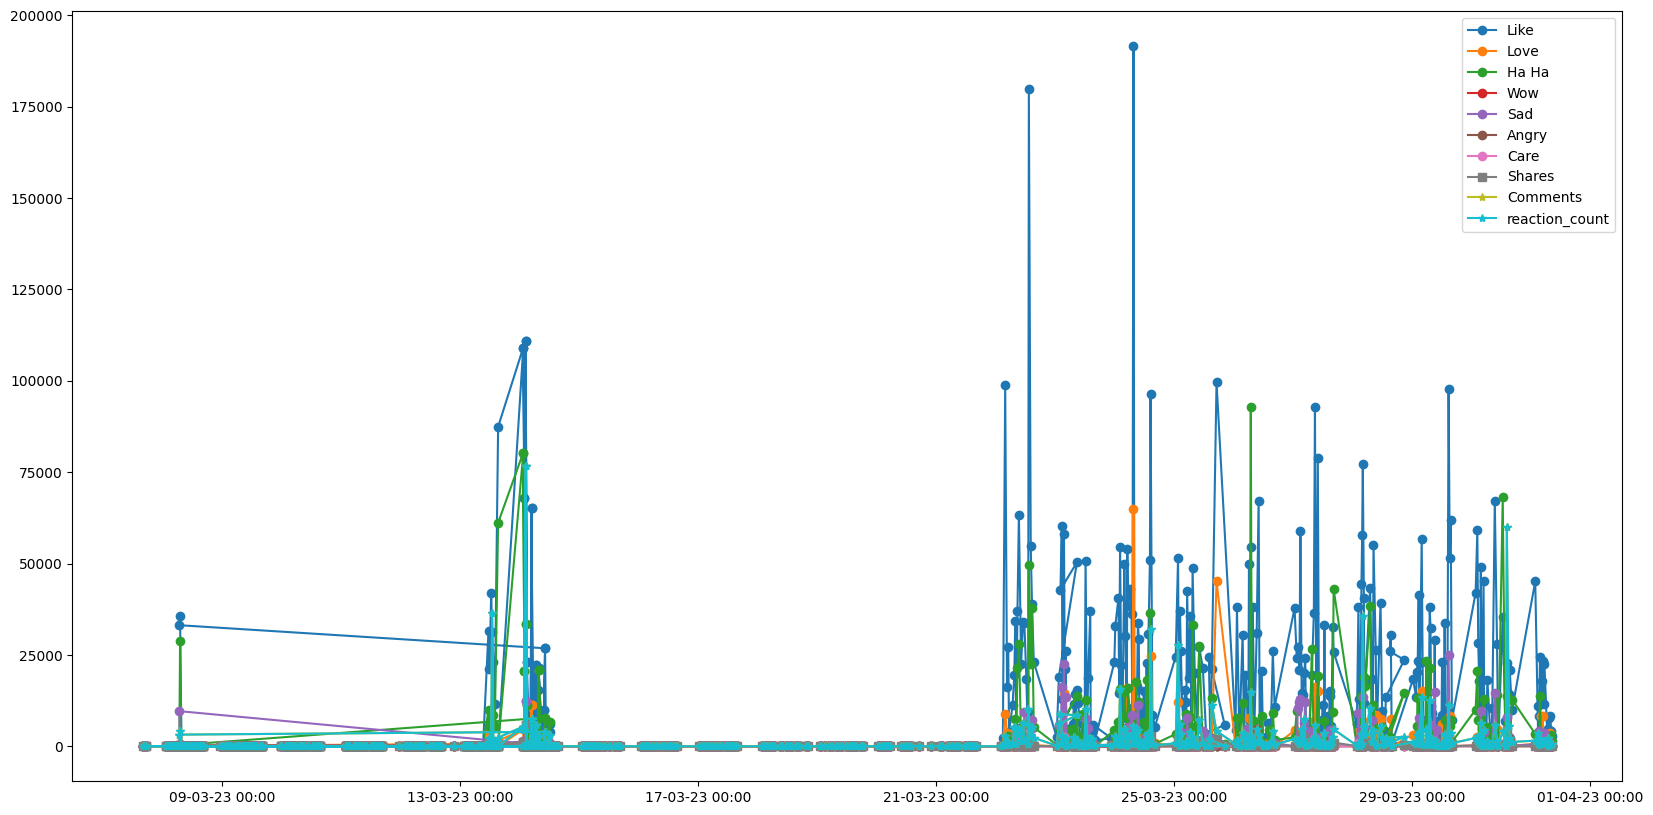

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
# hiển thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares']).sort_values(ascending = False))

wow              0.585503
thích            0.548041
buồn             0.415320
haha             0.408576
thương thương    0.360896
yêu thích        0.303127
phẫn nộ          0.065904
dtype: float64


In [ ]:
# Display Like, Love, Ha Ha, Wow, Sad, Angry, Care columns relationship with Comments
print(post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['comments']).sort_values(ascending = False))

wow              0.650597
thích            0.521247
buồn             0.407410
haha             0.361121
thương thương    0.224019
yêu thích        0.189940
phẫn nộ          0.092238
dtype: float64


In [ ]:
post_df_full_with_reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 1195
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        1069 non-null   int64         
 1   text                           1069 non-null   object        
 2   post_text                      1069 non-null   object        
 3   shared_text                    12 non-null     object        
 4   original_text                  0 non-null      float64       
 5   time                           1069 non-null   datetime64[ns]
 6   timestamp                      1056 non-null   float64       
 7   image                          748 non-null    object        
 8   image_lowquality               1069 non-null   object        
 9   images                         1069 non-null   object        
 10  images_description             1069 non-null   object        
 11  images_lowquality

In [ ]:
post_df_full_with_reactions = post_df_full_with_reactions[['post_id', 'text', 'post_text', 'comments', 'comments_full','post_url']]

In [ ]:
post_df_full_with_reactions.head()

,post_id,text,post_text,comments,comments_full,post_url
0,7341596765886180,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,647,"[{'comment_id': '779945130231810', 'comment_ur...",https://facebook.com/Theanh28/posts/7341596765...
1,7341544862558037,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,386,"[{'comment_id': '1206863516862381', 'comment_u...",https://facebook.com/Theanh28/posts/7341544862...
2,7341504075895449,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...","LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",256,"[{'comment_id': '541074801520673', 'comment_ur...",https://facebook.com/Theanh28/posts/7341504075...
3,7341432399235950,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,1148,"[{'comment_id': '887707828986840', 'comment_ur...",https://facebook.com/Theanh28/posts/7341432399...
4,7341374382575085,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,1261,"[{'comment_id': '143871098632154', 'comment_ur...",https://facebook.com/Theanh28/posts/7341374382...


##Phân tích POST

In [ ]:
post_df_full_with_reactions = post_df_full_with_reactions.reset_index()

In [ ]:
a = post_df_full_with_reactions.copy()
post = pd.DataFrame(a['post_text'], columns = ['post_text'])

In [ ]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  1069 non-null   object
dtypes: object(1)
memory usage: 8.5+ KB


In [ ]:
post.values.tolist()

###Preprocess Post

In [ ]:
!pip install nltk
!pip install pyvi
!pip install unidecode
!pip install demoji
!pip install Sastrawi
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!mkdir -p /root/nltk_data/corpora/stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
abbreviations = {
                  'cr': 'người thương thầm', 'ck': 'chồng', 'vk': 'vợ', 'm': 'bạn', 't': 'tôi', 'iu': 'yêu', 'dz': 'đẹp trai', 'hok': 'không', 'ultroi': 'không thể tin được',
                  'stt': 'bài đăng', 'zô': 'vào', 'goy': 'rồi', 'r': 'rồi', 'lun': 'luôn', 'lum': 'luôn', 'ghek': 'ghê', 'fb': 'Facebook', 'ig': 'Instagram', 'dzị': 'vậy',
                 'v': 'vậy', 's': 'sao', 'k': 'không', 'zị': 'vậy', 'cmnr': 'chừi thề', 'dm': 'chửi thề', 'đm': 'chửi thề', 'hnay': 'hôm nay', 'hog': 'hong', 'zữ': 'dữ',
                 'ib': 'nhắn tin', 'tks': 'cảm ơn', 'thpt': 'trung học phổ thông', 'đh': 'đại học', 'hlv': 'huấn luyện viên', 'mc': 'người dẫn chương trình', 'sờ trét': 'căng thẳng',
                 'vs': 'với', 'i': 'đi', 'h': 'bây giờ', 'cmt': 'bình luận', 'bth': 'bình thường', 'j': 'gì', 'lquan': 'liên quan', 'sml': 'sấp mặt', 'khok': 'khóc',
                 'chs': 'chơi', 'ak': 'à', 'pls': 'làm ơn', 'plz': 'làm ơn', 'trầm kẽm': 'trầm cảm', 'chầm zn': 'trầm cảm', 'trầm zn': 'trầm cảm', 'uk': 'ừ', 'trầm kảm': 'trầm cảm',
                 'kkk': 'cười', 'kkkk': 'cười', 'kk': 'cười','kkkkk': 'cười', 'kkkkkk': 'cười', 'douma': 'đụ má', 'đou': 'đâu', 'hjhj': 'cười', 'hihi': 'cười', 'shao': 'sao',
                 'hihihi': 'cười', 'csong': 'cuộc sống', 'dk': 'được', 'said': 'nói', 'xink': 'xinh', 'tung của': 'trung quốc', 'vn': 'việt nam', 'đc': 'được', 'kảm': 'cảm',
                 'oi': 'ơi', 'duma': 'chửi thề', 'qá': 'quá', 'đink': 'đỉnh', 'đinkk': 'đỉnh', 'đink': 'đỉnh', 'dinkout': 'đỉnh cao', 'đinkout': 'đỉnh cao', 'bvs': 'băng vệ sinh',
                 'z': 'vậy', 'ng': 'người', 'fl': 'theo dõi', 'nch': 'nói chuyện', 'cj': 'chị', 'thz': 'bạn', 'vkl': 'chửi thề', 'ysl': 'yếu sinh lý', 'sì chét': 'căng thẳng',
                 'ko': 'không', 'hp': 'hạnh phúc', 'spham': 'sản phẩm', 'qtr': 'quan trọng', 'a': 'anh', 'bn': 'bạn', 'b': 'bạn', 'bs': 'bác sĩ', 'mn': 'mọi người', 'tao': 'tôi',
                 'sstt': 'bài đăng', 'gvien': 'giáo viên', 'pass': 'mật khẩu', 'acc': 'tài khoản', 'fb': 'facebook', 'mày': 'bạn', 'hã': 'hả', 'try': 'trai', 'kg': 'kilogram',
                 'sg': 'sài gòn', 'hn': 'hà nội', 'ae': 'anh em', 'time': 'thời gian', 'bl': 'bình luận', 'on top': 'lên xu hướng', 'trend': 'thịnh hành', 'dị': 'vậy', 'néch': 'nách',
                 'post': 'bài đăng', 'nhma': 'nhưng mà', 'nx': 'nữa', 'nchung': 'nói chung', 'cx': 'cũng', 'ik': 'đi', 'rún': 'rốn', 'zin': 'nguyên vẹn', 'hk': 'không',
                 'vâg': 'vâng', 'khum': 'không', 'thui': 'thôi', 'thuii': 'thôi', 'cta': 'chúng ta', 'ròii': 'rồi', 'win': 'thắng', 'ố zề': 'làm quá', 'pán': 'bán', 'vàooooo': 'vào',
                 'in4': 'thông tin', 'infor': 'thông tin', 'bro': 'anh bạn', 'ulatroi': 'không thể tin được', 'bt': 'biết', 'hc': 'học', 'đm': 'chửi thề', 'vàooo': 'vào', 'cccd': 'căn cước công dân',
                 'ừm': 'ừ', 'kbiet': 'không biết', 'hssv': 'học sinh sinh viên', 'chời': 'trời', 'mxh': 'mạng xã hội', 'mik': 'mình', 'cty': 'công ty', 'mu': 'Manchester United',
                 'cr7': 'Cristiano Ronaldo', 'a7': 'Cristiano Ronaldo', 'm10': 'Lionel Messi', 'cđv': 'cổ động viên', 'zậy': 'vậy', 'fc': 'cộng đồng người hâm mộ',
                 'nyc': 'người yêu cũ', 'e': 'em', 'a': 'anh', 'zai': 'trai', 'pa': 'bạn', 'troai': 'trai', 'đuây': 'đây', 'mi': 'bạn', 'hong': 'hong', 'n9': 'nhân vật nam chính',
                 'n8': 'nhân vật nam phụ', 'póng': 'bóng', 'rùi': 'rồi', 'cụa': 'của', 'wa': 'quá', 'waaa': 'quá', 'ntn': 'như thế nào', 'tr': 'trời', 'tht': 'thật', 'ctay': 'chia tay', 'wenn': 'quen',
                 }

In [ ]:
import re
import string
import unidecode
import demoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pyvi import ViTokenizer

with open('/content/drive/MyDrive/Project/FACEBOOK analysis/vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
        stop_words = set(word.strip() for word in f)
def preprocess_vietnamese_text(text):

    text = re.sub(r'(\w+)Xem thêm (\w+)', r'\1 \2', text)
    # lowercase the text
    text = text.lower()

    #remove link
    text = re.sub(r'\b(?:https?://|www\.|bit\.ly/)\S+\b', '', text)
    text = re.sub(r'\b\S*\.com\S*\b', '', text)

    #replace word with this format 'a.b' with 'ab'
    text = re.sub(r'(\w)\.(\w)', r'\1\2', text)
    text = text.replace('/', ' ')

    # replace the abbreviations
    for abbr, full in abbreviations.items():
        text = re.sub(rf"\b{abbr}\b", full, text)

    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh):\s*\S+.*', '', text)
    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh) : \s*\S+.*', '', text)

    #remove accents
    #text = unidecode.unidecode(text)

    # remove emojis
    text = demoji.replace(text, '')

    # remove hastag
    text = re.sub(r'#\w+\b', '', text)

    # remove punctuation
    text = re.sub(r'[^\w\s]+', '', text)

    #remove number
    text = re.sub(r'\d+', '', text)

    # tokenize the text
    tokens = ViTokenizer.tokenize(text)

    # remove stop words
    tokens = [word for word in word_tokenize(tokens) if word not in stop_words]

    # join the tokens back into a single string
    text = " ".join(tokens)
    text = text.replace('_', ' ')
    return text

In [ ]:
post['clean_text'] = post['post_text'].apply(preprocess_vietnamese_text)
post.head()

,post_text,clean_text
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...


In [ ]:
post['clean_text'].to_list()

['kiếm triệu đồng chia sẻ nữ sinh ga belfast học chuyên ngành tâm lý học đại học lincoln đóng học phí sử dụng trang web hẹn hò hẹn hò khoản nợ học phí trị giá bảng triệu đồng hẹn hò nữ sinh tiền học chi phí trang trải khoản phí hàng tiền mua sắm quần áo hưởng thụ cuộc sống xa hoa ga bản thân có thể kiếm bảng triệu đồng bao gồm quà tặng giày quần áo',
 'đông lạc long quân hướng dẫn y tế hà lan hiến tặng tinh trùng có thể tối đa đứa bé xảy tình trạng loạn luân bảo vệ sức khỏe đàn ông jm danh sách đen thời điểm ta đứa trẻ chào đời phòng khám tiếp tục phân phát gen hà lan lẫn nước ngoài ties van der meer chủ tịch donorkind tổ chức tuần cuộc gọi mẹ khắp thế giới tất cả lo lắng liệu hiến điều tra cơ quan chức năng jm hiến tinh trùng phòng khám phòng khám hà lan ít nhất trẻ',
 'lớp học mơ ước xứng đáng hạnh phúc mới đây video ghi hình ảnh học sinh lớp tổ chức sinh nhật bất ngờ nam sinh bạch tạng quan tâm cư dân mạng thu triệu lượt đăng tải sinh nhật bánh hoa chắc chắn tình cảm lớp tụ tập hát 

In [ ]:
post_df_full_with_reactions['clean_text'] = post['clean_text']

In [ ]:
result_post = pd.DataFrame({'post_text': post['post_text'], 'clean_text': post['clean_text']})
result_post.head()

,post_text,clean_text
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...


###Pre-trained PhoBERT-base Model

In [ ]:
ab = post.copy()
ab.head()

,post_text,clean_text
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...


In [ ]:
!pip install torch
!pip install transformers

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
tokenizer_pbert = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
model_pbert = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=2)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

In [ ]:
def predict_sentiment(texts, model, tokenizer, threshold=0.5):
    # Tokenize and encode the text data
    encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Use the pre-trained model to predict sentiment scores
    outputs = model(**encoded_texts)
    scores = outputs.logits.softmax(dim=1).detach().numpy()

    # Classify the sentiment based on the threshold
    sentiment_labels = np.where(scores[:, 1] > threshold, "positive", "negative")

    # Return the sentiment labels
    return sentiment_labels

In [ ]:
ab['sentiment'] = [predict_sentiment(text, model_pbert, tokenizer_pbert) for text in ab['clean_text']]

In [ ]:
ab.head()

,post_text,clean_text,sentiment
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,[negative]
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,[positive]
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,[positive]
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,[positive]
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,[positive]


In [ ]:
ab.head()

,post_text,clean_text,sentiment
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,[negative]
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,[positive]
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,[negative]
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,[positive]
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,[positive]


In [ ]:
abcd = ab.copy()

In [ ]:
arr_list = abcd['sentiment'].tolist()

# Extract string values from numpy arrays using list comprehension
values = [arr[0] for arr in arr_list]

In [ ]:
abcd['sentiment'] = values

In [ ]:
abcd.head()

,post_text,clean_text,sentiment
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,negative
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,positive
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,positive
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,positive
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,positive


In [ ]:
result_post['phobert_label'] = abcd['sentiment']
result_post.head()

###Pre-trained BERT-based Model

In [ ]:
hgft = post.copy()
hgft.head()

,post_text,clean_text
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 78.3 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import pandas as pd

def predict_sentiment_bert(df, model_name):
    # Load the sentiment analysis pipeline
    sentiment_classifier = pipeline('sentiment-analysis', model=model_name)

    # Create new columns to store the predicted score and label
    df['score'] = None
    df['label'] = None
    label_mapping = {
        '1 star': 'negative',
        '2 stars': 'negative',
        '3 stars': 'positive',
        '4 stars': 'positive',
        '5 stars': 'positive'
    }
    # Loop through each text in the dataframe and make a prediction
    for i, text in enumerate(df['clean_text']):
        # Predict the score and label using the pipeline
        result = sentiment_classifier(text)[0]
        score = result['score']
        label = result['label']
        mapped_label = label_mapping[label]
        # Add the score and label to the respective columns
        df.at[i, 'score'] = score
        df.at[i, 'label'] = mapped_label

    return df

In [ ]:
predict_sentiment_bert(hgft, 'nlptown/bert-base-multilingual-uncased-sentiment')

,post_text,clean_text,score,label
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,0.487779,negative
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,0.276515,negative
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,0.327589,positive
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,0.28291,positive
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,0.436596,negative
...,...,...,...,...
1064,Hoa hậu Trái Đất 2018 - Nguyễn Phương Khánh đế...,hoa hậu trái đất nguyễn phương khánh việt nam ...,0.514723,positive
1065,"Chỉ trong ngày 8/3, đã có 10 triệu người thử l...",triệu thử thơ triệu thơ gửi đi zalo thông qua ...,0.258857,positive
1066,RICHARLISON THẤT VỌNG VÌ HLV CHO NGỒI DỰ BỊ\n\...,richarlison thất vọng huấn luyện viên dự bị ti...,0.605486,negative
1067,SIÊU LẦY GẶP SIÊU LỪA ĐÃ CÁN MỐC 50 TỶ ĐỒNG\n\...,siêu lầy siêu lừa cán mốc tỷ đồng sở hữu nội d...,0.34613,positive


In [ ]:
hgft.head(10)

,post_text,clean_text,score,label
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,0.487779,negative
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,0.276515,negative
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,0.327589,positive
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,0.28291,positive
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,0.436596,negative
5,Ngoại hạng Anh đã quay trở lại vào cuối tuần n...,ngoại hạng trở lại tuần đồng nghĩa chuỗi giải ...,0.251472,negative
6,Mang 5 sổ đỏ đi cắm lấy 95 triệu đồng 😢,sổ đỏ đi cắm triệu đồng,0.319478,negative
7,NỮ MC TẠI NGHỆ AN GÂY SỐT: 10 NĂM LIỀN LÀ HỌC ...,nữ chương trình nghệ an sốt liền học sinh giỏi...,0.270596,positive
8,HAI T.HI T.HỂ NGƯỜI VIỆT LÀ NAM GIỚI\n\nMới đâ...,hai thi thể việt nam giới mới đây trang taiwan...,0.515967,negative
9,"GẶT QUẢ NGỌT SAU 8 NĂM, CHÚC MỪNG GIA ĐÌNH\n\n...",gặt chúc mừng gia đình chiều bệnh viện sảnnhi ...,0.27761,positive


In [ ]:
result_post['bert_label'] = hgft['label']

In [ ]:
result_post.head()

In [ ]:
result_post.to_excel(FOLDER_PATH + 'result_post_sentiment' + ".xlsx", index=False)

##Phân Tích COMMENT

In [ ]:
post_df_full_with_reactions['clean_text'].head()

0    kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1    đông lạc long quân hướng dẫn y tế hà lan hiến ...
2    lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3    nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4    cảnh báo hàng loạt trẻ loạn thần điên dại ma t...
Name: clean_text, dtype: object

###Lấy Ra Các Post Có Từ/Nhiều Từ Về Chủ Đề Quan Tâm Để Lấy Các Comment Từ Các Post Đó

In [ ]:
cmt = post.copy()
cmt.head()

,post_text,clean_text
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...


In [ ]:
post_df_full_with_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1069 non-null   int64 
 1   post_id        1069 non-null   int64 
 2   text           1069 non-null   object
 3   post_text      1069 non-null   object
 4   comments       1069 non-null   int64 
 5   comments_full  1069 non-null   object
 6   post_url       1069 non-null   object
 7   clean_text     1069 non-null   object
dtypes: int64(3), object(5)
memory usage: 66.9+ KB


In [ ]:
import pandas as pd

topics = ['man united', 'bóng đá', 'real madrid', 'juventus','psg' , 'barcelona',
          'leo messi', 'christiano ronaldo', 'manchester united', 'bóng đá',
          'ngoại hạng anh', 'liverpool', 'juventus', 'cầu thủ', 'trận đấu', 'quả bóng vàng',
          'champion league', 'fifa']

# Create an empty dataframe to store the matching posts and comments
topic_cmt = pd.DataFrame(columns=['clean_text', 'comments_full', 'comments_count', 'post_url'])

# Iterate through each post and its comments
for i in range(len(post_df_full_with_reactions)):
    # Check if the value in the 'clean_text' column is not NaN
    if not pd.isna(post_df_full_with_reactions['clean_text'][i]):
        # Check if the post contains any of the keywords
        if any(topic in post_df_full_with_reactions['clean_text'][i] for topic in topics):
            # Append the matching post and its comments to the dataframe
            topic_cmt = topic_cmt.append({'clean_text': post_df_full_with_reactions['clean_text'][i],
                                          'comments_full': post_df_full_with_reactions['comments_full'][i],
                                          'comments_count': post_df_full_with_reactions['comments'][i],
                                          'post_url': post_df_full_with_reactions['post_url'][i]},
                                         ignore_index=True)


# Print the number of matching posts
print(f"Có tất cả {len(topic_cmt)} bài viết chứa từ khóa", ', '.join(topics))
#topic_cmt.head()

In [ ]:
topic_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_text      101 non-null    object
 1   comments_full   101 non-null    object
 2   comments_count  101 non-null    object
 3   post_url        101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [ ]:
len(topic_cmt[topic_cmt['comments_count'] == 0])

83

In [ ]:
sad = topic_cmt['comments_count'] == 0
topic_cmt = topic_cmt.drop(topic_cmt[sad].index)

In [ ]:
topic_cmt.info()
#cause i crawl lots of posts from facebook so i prevented me from getting too much information. that is why there is a lot of comments i could not crawl from posts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 47
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_text      18 non-null     object
 1   comments_full   18 non-null     object
 2   comments_count  18 non-null     object
 3   post_url        18 non-null     object
dtypes: object(4)
memory usage: 720.0+ bytes


###Lấy Các Comments Từ Các Post Trên Và Preprocess Comments

In [ ]:
text = topic_cmt['comments_full'].values.tolist()
text

####Gom Comment_text (FAIL :))) VÌ BỊ FB BÓP

In [ ]:
new_text = []
for i in text:
    new_str = re.sub(r'[\\\'{}\[\]]', '', i).replace('\\n', ' ')
    new_text.append(new_str)
new_text

In [ ]:
new_text

In [ ]:
comment_texts = []
for item in new_text:
    matches = re.findall(r'comment_text:\s*(.*?)(?=, \w+:|$)', item)
    comment_texts.extend(matches)
comment_texts

['Tôi dự đoán rằng 3-0 cho Man City và khiến Liverpool khả năng cao nhất là mất suất toàn bộ giải đấu châu Âu mùa sau',
 ':v',
 '3-2 cho Liverpool',
 'Thấy bài viết của Theanh28 Entertainment là tương tác nà 🥞',
 'Man xanh 4-3',
 '0-3 man xanh thắng',
 'Man xanh 5-1',
 'Man xanh nha 3-1',
 'Man xanh 1-0 liver',
 'Man xanh 2-0 liver',
 'Man xanh 2_1 😄😄',
 'Man xanh 2-2 liver',
 'Man xanh 2-1',
 'Man xanh 5-2 liver',
 'Man xanh 3-1 ạ',
 'Bảo Phạm Duy Khiêm',
 'Hữu Tú Nguyễn bây h liver ko đủ trình để đá vs mc thiệt mà.....',
 'Bảo Phạm đầu mùa có đủ trình đâu',
 'Man xanh 7-0',
 'Lê Yến Nhi á chà méc chị Phượng nhâ🤣',
 'Mc -0.75 về pờ',
 'Tuy ko phải fan Liverpool mà cầu cho nó thắng man city để arsenal vô địch 😂😂😂',
 'RoBin Van Hieu xuống tiền mà theo.',
 'Khắc Hậu 😂😂😂 Liverpool mùa ni yếu lắm Theo nó mà trôi sông àk 🤣',
 'RoBin Van Hieu 👍',
 '3-1 cho man xanh 🤣',
 'Kkk xong mai là 1/4, cá tháng tư nên vô vị kkk',
 'Hoà 2 đều nhá.90p',
 'Đỗ Nguyên Phúc anh cứ tưởng là em!',
 'Bóng đá Th

In [ ]:
cmt_noname = []
for sentence in comment_texts:
    words = sentence.split()
    for i, word in enumerate(words):
        if word.islower():
          upper_word = [w for w in words[0:i]]
          if len(upper_word) > 1:
            new_sentence = ' '.join(words[i:])
            break
          else:
            new_sentence = sentence
            break
    else:
        new_sentence = ''
    cmt_noname.append(new_sentence.strip())

cmt_noname

In [ ]:
df = pd.DataFrame({'Comments': cmt_noname})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  596 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


####ĐI CÀO LẠI COMMENT TỪ POST URL :))

In [ ]:
from typing import List
import time



def extract_comments(url: str, max_comments_per_post: int = 600, timeout: int = 10, wait: int = 1) -> List[str]:
    all_comments = []
    for post in get_posts(post_urls=[url], cookies=COOKIE_PATH, options={"comments": True, "allow_extra_requests": False}):
        if 'comments_full' in post:
            comments = [comment['comment_text'] for comment in post['comments_full'][:max_comments_per_post]]
            all_comments.extend(comments)
        else:
            print(f"No comments found for post: {post['post_url']}")
        time.sleep(wait)
        if len(all_comments) >= max_comments_per_post:
            break

    return all_comments



In [ ]:
topic_cmt['all_comments'] = topic_cmt["post_url"].apply(extract_comments)

In [ ]:
topic_cmt['all_comments'].tolist()

In [ ]:
all = []
for i in topic_cmt['all_comments']:
  for j in i:
    all.append(j)

In [ ]:
cmt_all = pd.DataFrame(all, columns=['Comment'])
cmt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  7112 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


In [ ]:
cmt_all.to_excel(FOLDER_PATH + 'comments' + ".xlsx", index=False)

/content/drive/MyDrive/Project/Crawldata/Theanh28.xlsx


####Preprocess Comments

In [ ]:
cmt_all = pd.read_excel('/content/drive/MyDrive/Project/Crawldata/comments.xlsx', keep_default_na=False)
cmt_all.head()

,Comment
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...
1,LIVERPOOL 2-1
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...
3,Man xanh 2/0
4,3-2 cho Liverpool


In [ ]:
cmt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  7112 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


In [ ]:
with open('/content/drive/MyDrive/Project/Crawldata/vietnamese-stopwords.txt', 'r', encoding='utf-8') as f:
        stop_words = set(word.strip() for word in f)
def preprocess_vietnamese_text_comment(text):
    # lowercase the text
    text = text.lower()

    # replace newlines with '. '
    text = text.replace('\n', '.')
    # replace multiple dots with a single dot
    text = re.sub(r'\.{2,}', '. ', text)

    #remove link
    text = re.sub(r'\b(?:https?://|www\.|bit\.ly/)\S+\b', '', text)
    text = re.sub(r'\b\S*\.com\S*\b', '', text)

    #replace word with this format 'a.b' with 'ab'
    text = re.sub(r'(\w)\.(\w)', r'\1\2', text)
    text = text.replace('/', ' ')
    # replace the abbreviations
    for abbr, full in abbreviations.items():
        text = re.sub(rf"\b{abbr}\b", full, text)

    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh):\s*\S+.*', '', text)
    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh) : \s*\S+.*', '', text)
    # remove accents
    #text = unidecode.unidecode(text)

    # remove emojis
    text = demoji.replace(text, '')

    # remove hastag
    text = re.sub(r'#\w+\b', '', text)

    # remove punctuation
    text = re.sub(r'[^\w\s]+', '', text)

    #remove number
    text = re.sub(r'\d+', '', text)

    # tokenize the text
    tokens = ViTokenizer.tokenize(text)

    # remove stop words
    tokens = [word for word in word_tokenize(tokens) if word not in stop_words]

    # join the tokens back into a single string
    text = " ".join(tokens)
    text = text.replace('_', ' ')
    return text

In [ ]:
cmt_all['clean_comment'] = cmt_all['Comment'].apply(preprocess_vietnamese_text_comment)
cmt_all.head()

,Comment,clean_comment
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ
1,LIVERPOOL 2-1,liverpool
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...
3,Man xanh 2/0,man xanh
4,3-2 cho Liverpool,liverpool


In [ ]:
cmt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        7112 non-null   object
 1   clean_comment  7112 non-null   object
dtypes: object(2)
memory usage: 111.2+ KB


In [ ]:
cmt_all = cmt_all.replace('', None)

In [ ]:
cmt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        7112 non-null   object
 1   clean_comment  6873 non-null   object
dtypes: object(2)
memory usage: 111.2+ KB


In [ ]:
cmt_all.dropna(inplace = True)
cmt_all.reset_index(drop = True)

,Comment,clean_comment
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ
1,LIVERPOOL 2-1,liverpool
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...
3,Man xanh 2/0,man xanh
4,3-2 cho Liverpool,liverpool
...,...,...
6868,Máy tính nói những điều mà ai cũng biết,máy tính
6869,Máy tính vẫn là máy thôi đúng nhận sai cãi hih...,máy tính máy sai cãi cười mansiti
6870,Troll,troll
6871,"tao buồn đấy, vì đó là đội tuyển thằng nyc nó ...",buồn đấy đội tuyển thằng người yêu cũ


In [ ]:
cmt_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7111
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        6873 non-null   object
 1   clean_comment  6873 non-null   object
dtypes: object(2)
memory usage: 161.1+ KB


###Pre-trained PhoBERT Model

In [ ]:
cmt_pbert = cmt_all.copy()

In [ ]:
cmt_pbert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7111
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        6873 non-null   object
 1   clean_comment  6873 non-null   object
dtypes: object(2)
memory usage: 161.1+ KB


In [ ]:
cmt_pbert['sentiment'] = [predict_sentiment(text, model_pbert, tokenizer_pbert) for text in cmt_pbert['clean_comment']]

In [ ]:
cmt_pbert1 = cmt_pbert.copy()

In [ ]:
arr_list1 = cmt_pbert1['sentiment'].tolist()

# Extract string values from numpy arrays using list comprehension
values1 = [arr[0] for arr in arr_list1]

In [ ]:
cmt_pbert1['sentiment'] = values1

In [ ]:
cmt_pbert1.head()

,Comment,clean_comment,sentiment
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ,positive
1,LIVERPOOL 2-1,liverpool,negative
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...,negative
3,Man xanh 2/0,man xanh,negative
4,3-2 cho Liverpool,liverpool,negative


In [ ]:
result_cmt = pd.DataFrame({'Comment': cmt_pbert1['Comment'], 'clean_comment': cmt_pbert1['clean_comment'], 'phobert_label': cmt_pbert1['sentiment']})
result_cmt.head()

,Comment,clean_comment,phobert_label
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ,positive
1,LIVERPOOL 2-1,liverpool,negative
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...,negative
3,Man xanh 2/0,man xanh,negative
4,3-2 cho Liverpool,liverpool,negative


###Pre-trained Bert-base Model

In [ ]:
cmt_bert = cmt_all.copy()
cmt_bert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7111
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        6873 non-null   object
 1   clean_comment  6873 non-null   object
dtypes: object(2)
memory usage: 161.1+ KB


In [ ]:
cmt_bert.head(6873)

,Comment,clean_comment
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ
1,LIVERPOOL 2-1,liverpool
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...
3,Man xanh 2/0,man xanh
4,3-2 cho Liverpool,liverpool
...,...,...
7107,Máy tính nói những điều mà ai cũng biết,máy tính
7108,Máy tính vẫn là máy thôi đúng nhận sai cãi hih...,máy tính máy sai cãi cười mansiti
7109,Troll,troll
7110,"tao buồn đấy, vì đó là đội tuyển thằng nyc nó ...",buồn đấy đội tuyển thằng người yêu cũ


In [ ]:
from transformers import pipeline
import pandas as pd

def predict_sentiment_bert1bert1(df, model_name):
    # Load the sentiment analysis pipeline
    sentiment_classifier = pipeline('sentiment-analysis', model=model_name)

    # Create new columns to store the predicted score and label
    df['score'] = None
    df['label'] = None
    label_mapping = {
        '1 star': 'negative',
        '2 stars': 'negative',
        '3 stars': 'positive',
        '4 stars': 'positive',
        '5 stars': 'positive'
    }
    # Loop through each text in the dataframe and make a prediction
    for i, text in enumerate(df['clean_comment']):
        # Predict the score and label using the pipeline
        result = sentiment_classifier(text)[0]
        score = result['score']
        label = result['label']
        mapped_label = label_mapping[label]
        # Add the score and label to the respective columns
        df.at[i, 'score'] = score
        df.at[i, 'label'] = mapped_label

    return df

In [ ]:
predict_sentiment_bert1bert1(cmt_bert, 'nlptown/bert-base-multilingual-uncased-sentiment')

,Comment,clean_comment,score,label
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ,0.335443,positive
1,LIVERPOOL 2-1,liverpool,0.276354,positive
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...,0.457356,positive
3,Man xanh 2/0,man xanh,0.248649,positive
4,3-2 cho Liverpool,liverpool,0.276354,positive
...,...,...,...,...
6589,NaN,NaN,0.243814,positive
6636,NaN,NaN,0.499877,positive
6664,NaN,NaN,0.278199,positive
6673,NaN,NaN,0.268998,positive


In [ ]:
result_cmt['bert_label'] = cmt_bert['label']

In [ ]:
result_cmt.head(20)

,Comment,clean_comment,phobert_label,bert_label
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ,positive,positive
1,LIVERPOOL 2-1,liverpool,negative,positive
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...,negative,positive
3,Man xanh 2/0,man xanh,negative,positive
4,3-2 cho Liverpool,liverpool,negative,positive
5,Thấy bài viết của Theanh28 Entertainment là tư...,viết theanh entertainment tương tác nà,negative,positive
6,7.0 cho mc,chương trình,positive,positive
7,Man xanh 2-1,man xanh,negative,positive
8,3-2 cho. Liverpool,liverpool,negative,positive
9,Man xanh 7-2😙,man xanh,negative,positive


In [ ]:
result_cmt.to_excel(FOLDER_PATH + 'result_comment_sentiment' + ".xlsx", index=False)

#Đánh giá Sentiment

In [ ]:
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
dg_post = pd.read_excel('/content/drive/MyDrive/Project/Crawldata/result_post_sentiment.xlsx')
dg_post.head()

,post_text,clean_text,phobert_label,bert_label
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,kiếm triệu đồng chia sẻ nữ sinh ga belfast học...,negative,negative
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,đông lạc long quân hướng dẫn y tế hà lan hiến ...,positive,negative
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",lớp học mơ ước xứng đáng hạnh phúc mới đây vid...,positive,positive
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,nghi phạm âm tính chất cấm hoàn toàn tỉnh táo ...,positive,positive
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,cảnh báo hàng loạt trẻ loạn thần điên dại ma t...,positive,negative


In [ ]:
dg_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post_text      1069 non-null   object
 1   clean_text     1066 non-null   object
 2   phobert_label  1069 non-null   object
 3   bert_label     1069 non-null   object
dtypes: object(4)
memory usage: 33.5+ KB


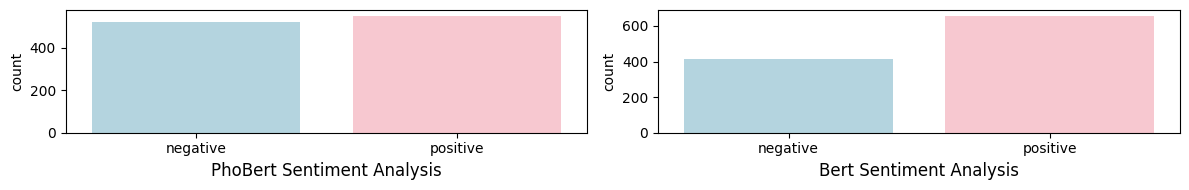

In [ ]:
plt.figure(figsize = (12, 2))

plt.subplot(1, 2, 1)
sns.countplot(x= dg_post['phobert_label'].values, palette=["#ADD8E6", "#FFC0CB"])
plt.xlabel('PhoBert Sentiment Analysis', fontsize = 12)

plt.subplot(1, 2, 2)
sns.countplot(x= dg_post['bert_label'].values, palette=["#ADD8E6", "#FFC0CB"])
plt.xlabel('Bert Sentiment Analysis', fontsize = 12)

plt.tight_layout()
plt.show()


In [ ]:
dg_cmt = pd.read_excel('/content/drive/MyDrive/Project/Crawldata/result_comment_sentiment.xlsx')
dg_cmt.head()

,Comment,clean_comment,phobert_label,bert_label
0,Thưởng 5 triệu nên ae đoán tỷ số tại đây mới t...,thưởng triệu anh em đoán tỷ số hợp lệ,positive,positive
1,LIVERPOOL 2-1,liverpool,negative,positive
2,Tôi dự đoán rằng 3-0 cho Man City và khiến Liv...,dự đoán man city liverpool khả năng suất toàn ...,negative,positive
3,Man xanh 2/0,man xanh,negative,positive
4,3-2 cho Liverpool,liverpool,negative,positive


In [ ]:
dg_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comment        6873 non-null   object
 1   clean_comment  6873 non-null   object
 2   phobert_label  6873 non-null   object
 3   bert_label     6652 non-null   object
dtypes: object(4)
memory usage: 214.9+ KB


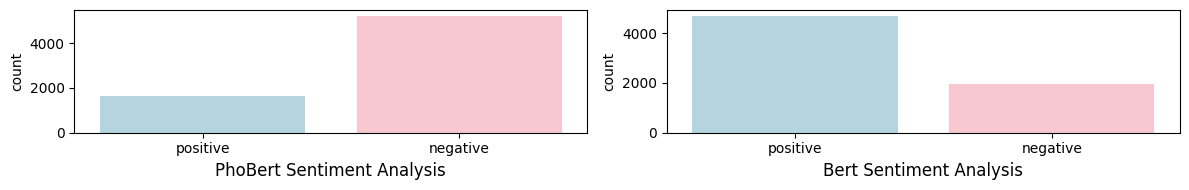

In [ ]:
plt.figure(figsize = (12, 2))

plt.subplot(1, 2, 1)
sns.countplot(x= dg_cmt['phobert_label'].values, palette=["#ADD8E6", "#FFC0CB"])
plt.xlabel('PhoBert Sentiment Analysis', fontsize = 12)

plt.subplot(1, 2, 2)
sns.countplot(x= dg_cmt['bert_label'].values, palette=["#ADD8E6", "#FFC0CB"])
plt.xlabel('Bert Sentiment Analysis', fontsize = 12)

plt.tight_layout()
plt.show()


#Post Recommender System And Text Summerization

In [ ]:
dl = pd.DataFrame({'post_text': post_df_full_with_reactions['post_text'], 'post_url': post_df_full_with_reactions['post_url']})
dl.head()

,post_text,post_url
0,KIẾM GẦN 9 TRIỆU ĐỒNG/NGÀY\n\nTheo chia sẻ của...,https://facebook.com/Theanh28/posts/7341596765...
1,ĐÔNG CON HƠN CẢ LẠC LONG QUÂN\n\nTheo hướng dẫ...,https://facebook.com/Theanh28/posts/7341544862...
2,"LỚP HỌC NHIỀU NGƯỜI MƠ ƯỚC, AI CŨNG XỨNG ĐÁNG ...",https://facebook.com/Theanh28/posts/7341504075...
3,NGHI PHẠM ÂM TÍNH VỚI CHẤT CẤM VÀ HOÀN TOÀN TỈ...,https://facebook.com/Theanh28/posts/7341432399...
4,CẢNH BÁO: HÀNG LOẠT CÁC BẠN TRẺ BỊ L.OẠN T.HẦN...,https://facebook.com/Theanh28/posts/7341374382...


##Recommender Post

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [ ]:
def preprocess_vietnamese_text_deeplearning(text):

    text = re.sub(r'(\w+)Xem thêm (\w+)', r'\1 \2', text)
    text = text.replace('/', ' ')
    # lowercase the text
    text = text.lower()

    # replace newlines with '. '
    text = text.replace('\n', '.')
    # replace multiple dots with a single dot
    text = re.sub(r'\.{2,}', '. ', text)

    #replace word with this format 'a.b' with 'ab'
    text = re.sub(r'(\w)\.(\w)', r'\1\2', text)

    # replace the abbreviations
    for abbr, full in abbreviations.items():
        text = re.sub(rf"\b{abbr}\b", full, text)

    text = re.sub(r'\b(cre|theo|nguồn):\s*\S+\s*', '', text)
    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh) : \s*\S+.*', '', text)
    # remove accents
    #text = unidecode.unidecode(text)

    # remove emojis
    text = demoji.replace(text, '')

    # remove hastag
    text = re.sub(r'#\w+\b', '', text)

    #remove link
    text = re.sub(r'\b(?:https?://|www\.|bit\.ly/)\S+\b', '', text)
    text = re.sub(r'\b\S*\.com\S*\b', '', text)

    # remove punctuation
    #text = re.sub(r'(\w)[^\w\s]+', r'\1 ', text)
    text = re.sub(r'[^\w\s]+', '', text)

    #remove number
    text = re.sub(r'\d+', '', text)

    # tokenize the text
    tokens = ViTokenizer.tokenize(text)

    # join the tokens back into a single string
    text = "".join(tokens)
    text = text.replace('_', ' ')
    return text

In [ ]:
dl['clean_text'] = dl['post_text'].apply(preprocess_vietnamese_text_deeplearning)
dl['clean_text'].values.tolist()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


# Extract features using TF-IDF
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(dl['clean_text'])

# Build k-NN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(features)

# Define input sentences
input_sentences = ['tôi muốn xem những vụ việc, án mạng, tin nóng mà cộng đồng mạng quan tâm nhiều.']

# Preprocess input sentences
preprocessed_input_sentences = [preprocess_vietnamese_text_deeplearning(sentence) for sentence in input_sentences]

# Extract features for input sentences
input_features = tfidf.transform(preprocessed_input_sentences)

# Find most similar posts to input sentences
distances, indices = knn.kneighbors(input_features)
similar_posts = dl.iloc[np.ravel(indices)]

# Display similar posts with URLs
similar_posts_with_urls = pd.DataFrame({'Post': similar_posts['post_text'], 'URL': similar_posts['post_url']})
for i, sentence in enumerate(input_sentences):
    print("Similar posts to input sentence '{}':".format(sentence))
    print(similar_posts_with_urls.iloc[i])

Similar posts to input sentence 'tôi muốn xem những vụ việc, án mạng, tin nóng mà cộng đồng mạng quan tâm nhiều.':
Post    SỰ VIỆC ĐANG ĐƯỢC QUAN TÂM NHẤT LÚC NÀY\n\nMới...
URL     https://facebook.com/Theanh28/posts/7337134312...
Name: 34, dtype: object


In [ ]:
similar_posts_with_urls.head()

,Post,URL
34,SỰ VIỆC ĐANG ĐƯỢC QUAN TÂM NHẤT LÚC NÀY\n\nMới...,https://facebook.com/Theanh28/posts/7337134312...
249,NGUYÊN NHÂN NÀO LẠI KHIẾN MỘT NGƯỜI GIỎI NHƯ V...,https://facebook.com/Theanh28/posts/7312199008...
53,"NGƯỜI NGHỆ SỸ CHÂN CHÍNH\n\n""Một đơn vị đã liê...",https://facebook.com/Theanh28/posts/7334738166...
361,"KHÔNG PHẢI TÌNH CỜ MÀ PHÁT HIỆN, PHÁ ÁN\n\nTra...",https://facebook.com/Theanh28/posts/7295527993...
299,VẪN CÒN MỘT NGƯỜI ĐỒNG NGHIỆP CHUNG HÃNG LIÊN ...,https://facebook.com/Theanh28/posts/7304136256...


In [ ]:
similar_posts_with_urls['Post'].values.tolist()

['SỰ VIỆC ĐANG ĐƯỢC QUAN TÂM NHẤT LÚC NÀY\n\nMới đây, một video của một anh shipper đang nhận được sự quan tâm của cư dân mạng.\n\nTheo lời anh kể lại, anh giao mặt hàng quần áo cho cô gái trong clip với giá trị trênXem thêm 300.000 đồng. Sau khi nhận hàng cô gái xin vào nhà để thử, vì đơn cho phép khách xem hàng nên anh đã đồng ý.\n\nSau khi cô gái thử xong thì lại ra và nói là chưa nhận được hàng.\n\nTranh cãi một hồi, mẹ cô gái cũng ra bênh vực con gái và hỏi anh shipper: "Có được học không mà nói chuyện với con t? vào nhà đi con, không nói chuyện với loại người này".\n\nNguồn : Xinxinniu',
 'NGUYÊN NHÂN NÀO LẠI KHIẾN MỘT NGƯỜI GIỎI NHƯ VẬY PHẢI VÀO TRẠI T.ÂM TH.ẦN...\n\nMới đây, video ghi lại hình ảnh một chàng trai nói được 5,6 ngoại ngữ nhưng số phận đưa đẩy phải trại t.â.m thần đã nhận được sự quanXem thêm tâm của cư dân mạng.\n\nDưới video nhiều cư dân mạng thắc mắc, không hiểu vì biến cố gì mà anh chàng lại trở nên như vậy\n\nVideo: Saavasugk',
 'NGƯỜI NGHỆ SỸ CHÂN CHÍNH\n\n"M

In [ ]:
similar_posts_with_urls['URL'].values.tolist()

['https://facebook.com/Theanh28/posts/7337134312999092',
 'https://facebook.com/Theanh28/posts/7312199008825956',
 'https://facebook.com/Theanh28/posts/7334738166572040',
 'https://facebook.com/Theanh28/posts/7295527993826391',
 'https://facebook.com/Theanh28/posts/7304136256298898']

##Text Summerization

In [ ]:
text_sum = pd.DataFrame(similar_posts_with_urls['Post'], columns = ['Post'])
text_sum.head()

,Post
34,SỰ VIỆC ĐANG ĐƯỢC QUAN TÂM NHẤT LÚC NÀY\n\nMới...
249,NGUYÊN NHÂN NÀO LẠI KHIẾN MỘT NGƯỜI GIỎI NHƯ V...
53,"NGƯỜI NGHỆ SỸ CHÂN CHÍNH\n\n""Một đơn vị đã liê..."
361,"KHÔNG PHẢI TÌNH CỜ MÀ PHÁT HIỆN, PHÁ ÁN\n\nTra..."
299,VẪN CÒN MỘT NGƯỜI ĐỒNG NGHIỆP CHUNG HÃNG LIÊN ...


In [ ]:
text_sum['Post'].values.tolist()

['SỰ VIỆC ĐANG ĐƯỢC QUAN TÂM NHẤT LÚC NÀY\n\nMới đây, một video của một anh shipper đang nhận được sự quan tâm của cư dân mạng.\n\nTheo lời anh kể lại, anh giao mặt hàng quần áo cho cô gái trong clip với giá trị trênXem thêm 300.000 đồng. Sau khi nhận hàng cô gái xin vào nhà để thử, vì đơn cho phép khách xem hàng nên anh đã đồng ý.\n\nSau khi cô gái thử xong thì lại ra và nói là chưa nhận được hàng.\n\nTranh cãi một hồi, mẹ cô gái cũng ra bênh vực con gái và hỏi anh shipper: "Có được học không mà nói chuyện với con t? vào nhà đi con, không nói chuyện với loại người này".\n\nNguồn : Xinxinniu',
 'NGUYÊN NHÂN NÀO LẠI KHIẾN MỘT NGƯỜI GIỎI NHƯ VẬY PHẢI VÀO TRẠI T.ÂM TH.ẦN...\n\nMới đây, video ghi lại hình ảnh một chàng trai nói được 5,6 ngoại ngữ nhưng số phận đưa đẩy phải trại t.â.m thần đã nhận được sự quanXem thêm tâm của cư dân mạng.\n\nDưới video nhiều cư dân mạng thắc mắc, không hiểu vì biến cố gì mà anh chàng lại trở nên như vậy\n\nVideo: Saavasugk',
 'NGƯỜI NGHỆ SỸ CHÂN CHÍNH\n\n"M

In [ ]:
def preprocess_vietnamese_text_deeplearning_extra(text):
    text = re.sub(r'(\w+)Xem thêm (\w+)', r'\1 \2', text)
    text = text.replace('/', ' ')

    # lowercase the text
    text = text.lower()

    #replace word with this format 'a.b' with 'ab'
    text = re.sub(r'(\w)\.(\w)', r'\1\2', text)

    # replace newlines with '. '
    text = text.replace('\n', '.')
    # replace multiple dots with a single dot
    text = re.sub(r'\.{2,}', '. ', text)

    text = re.sub(r'(\w+)xem thêm (\w+)', r'\1 \2', text)
    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh):\s*\S+.*', '', text)
    text = re.sub(r'\b(cre|theo|nguồn|video|hình ảnh) : \s*\S+.*', '', text)
    # remove accents
    #text = unidecode.unidecode(text)

    # remove emojis
    text = demoji.replace(text, '')

    # remove hastag
    text = re.sub(r'#\w+\b', '', text)

    #remove link
    text = re.sub(r'\b(?:https?://|www\.|bit\.ly/)\S+\b', '', text)
    text = re.sub(r'\b\S*\.com\S*\b', '', text)


    return text

In [ ]:
text_sum['clean_text'] = text_sum['Post'].apply(preprocess_vietnamese_text_deeplearning_extra)
text_sum['clean_text'].tolist()

['sự việc đang được quan tâm nhất lúc này. mới đây, một video của một anh shipper đang nhận được sự quan tâm của cư dân mạng. theo lời anh kể lại, anh giao mặt hàng quần áo cho cô gái trong clip với giá trị trên 300000 đồng. sau khi nhận hàng cô gái xin vào nhà để thử, vì đơn cho phép khách xem hàng nên anh đã đồng ý. sau khi cô gái thử xong thì lại ra và nói là chưa nhận được hàng. tranh cãi một hồi, mẹ cô gái cũng ra bênh vực con gái và hỏi anh shipper: "có được học không mà nói chuyện với con t? vào nhà đi con, không nói chuyện với loại người này". ',
 'nguyên nhân nào lại khiến một người giỏi như vậy phải vào trại tâm thần. mới đây, video ghi lại hình ảnh một chàng trai nói được 5,6 ngoại ngữ nhưng số phận đưa đẩy phải trại tâ.m thần đã nhận được sự quan tâm của cư dân mạng. dưới video nhiều cư dân mạng thắc mắc, không hiểu vì biến cố gì mà anh chàng lại trở nên như vậy. ',
 'người nghệ sỹ chân chính. "một đơn vị đã liên lạc với tôi muốn ký hợp đồng và quản lý tất cả số tranh sau n

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00


In [ ]:
import torch

from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

model = T5ForConditionalGeneration.from_pretrained("NlpHUST/t5-small-vi-summarization")
tokenizer = T5Tokenizer.from_pretrained("NlpHUST/t5-small-vi-summarization")
model.to(device)

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


T5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo)

In [ ]:
src = text_sum['clean_text'].tolist()

In [ ]:
summary_post = []
for i in src:
  tokenized_text = tokenizer.encode(i, return_tensors="pt").to(device)
  model.eval()
  summary_ids = model.generate(
                      tokenized_text,
                      max_length=256,
                      num_beams=5,
                      repetition_penalty=2.5,
                      length_penalty=1.0,
                      early_stopping=True
                  )
  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  summary_post.append(output)

In [ ]:
summary_post

['Một video của một anh shipper đang nhận được sự quan tâm của cư dân mạng. Sau khi nhận hàng cô gái xin vào nhà để thử xong thì lại ra và nói là chưa nhận được hàng, vì đơn cho phép khách xem hàng nên anh đã đồng ý.',
 'Trong video nhiều cư dân mạng thắc mắc, không hiểu vì biến cố gì mà anh chàng lại trở nên như vậy. Video ghi lại hình ảnh một chàng trai nói được 5,6 ngoại ngữ nhưng số phận đưa đẩy phải trại tâ.m thần đã nhận được sự quan tâm của cư dân mạng.',
 'Đơn vị đã liên lạc với tôi muốn ký hợp đồng và quản lý tất cả số tranh sau này của tôi vẽ ra và yêu cầu không được đăng lên mạng. Việc này rất khó đối với tôi vì tôi là kẻ sống tự do không thích tiếp xúc với thế giới bên ngoài, có cảm xúc mới vẽ không thích vẽ thì uống rượu ngủ, sống tự do tự tại...',
 'Cục trưởng cục hải quan tỉnh Ngọc Thắng khẳng định, không phải việc phát hiện, phá án dạng này là tình cờ mà phát hiện, phá án. Trước đó, kiểm tra hành lý của 4 tiếp viên Vietnam Airlines, lực lượng chức năng phát hiện 11,48 k

In [ ]:
similar_posts_with_urls['URL'].tolist()

['https://facebook.com/Theanh28/posts/7337134312999092',
 'https://facebook.com/Theanh28/posts/7312199008825956',
 'https://facebook.com/Theanh28/posts/7334738166572040',
 'https://facebook.com/Theanh28/posts/7295527993826391',
 'https://facebook.com/Theanh28/posts/7304136256298898']